# US SSA Birth Data

We're going to explore some data on births in the US from the US Social Security Administration. The data we'll be using was curated by [FiveThirtyEight](https://github.com/fivethirtyeight/data/tree/master/births).

The data is already in this repository in the `data` directory, but you could also download it from [here](https://raw.githubusercontent.com/fivethirtyeight/data/master/births/US_births_2000-2014_SSA.csv).

```bash
mkdir -p ../data
wget -qO ../data/US_births_2000-2014_SSA.csv https://raw.githubusercontent.com/fivethirtyeight/data/master/births/US_births_2000-2014_SSA.csv
```

To get started we'll have to figure out how to read the data contained in the comma separated value (CSV) file.

## Environment

I highly encourage you to use [miniconda](https://docs.conda.io/en/latest/miniconda.html) to manage your python environment (which plays nicely with [VSCode](https://code.visualstudio.com/download)).  Follow the instructions to install miniconda, which will set you up with the `conda` command line tool for managing your environments.

You can use `requirements.txt` in this repository to set up an environment with the packages we need.  To do so, open a terminal window, navigate to the base directory of the repository, and run

```bash
conda create -n births python=3.10 pip
```

This creates an environment called `births` running python version 3.10, with `pip` installed.  Now activate that environment and install the required packages within it:

```bash
conda activate births
pip install -r requirements.txt
```

## I/O with `pandas`

We'll be using `pandas` to read the CSV file and manage data.  I'm going to assume you're using a `conda` environment with `pandas`, `numpy`, `matplotlib`, and `seaborn` installed.  If you're using a different environment, you may have to install some things (e.g., using `pip`).

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../data/US_births_2000-2014_SSA.csv')
df

,year,month,date_of_month,day_of_week,births
0,2000,1,1,6,9083
1,2000,1,2,7,8006
2,2000,1,3,1,11363
3,2000,1,4,2,13032
4,2000,1,5,3,12558
...,...,...,...,...,...
5474,2014,12,27,6,8656
5475,2014,12,28,7,7724
5476,2014,12,29,1,12811
5477,2014,12,30,2,13634


The `read_csv()` function automatically parses the column names and assigns proper data types to the columns, returning a `DataFrame` object.  Please read [the docs](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html) to learn all the gory details about `DataFrames`.

## Plotting

`matplotlib` is going to be our go-to plotting library.  We'll also make use of some domain-specific plotting libraries like `seaborn`, `arviz`, etc. throughout the term, many of which are built on top of `matplotlib`.

In [3]:
import matplotlib.pyplot as plt

First we'll make a simple histogram.

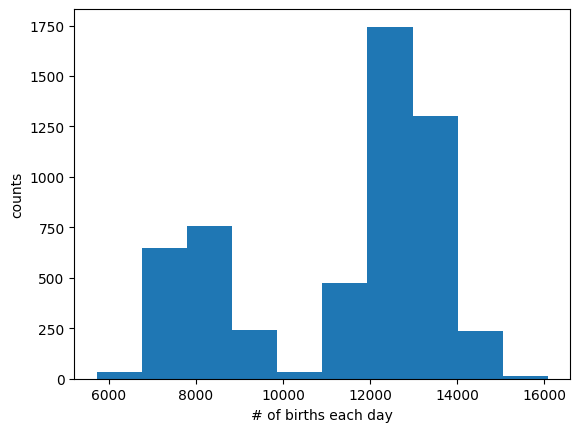

In [4]:
plt.hist(df['births'])
plt.xlabel('# of births each day')
plt.ylabel('counts');

We will also be using `numpy` *extensively* for efficient number-crunching.

In [5]:
import numpy as np

In [6]:
np.mean(df['births'])

11350.068260631502

Now let's make a scatter plot.

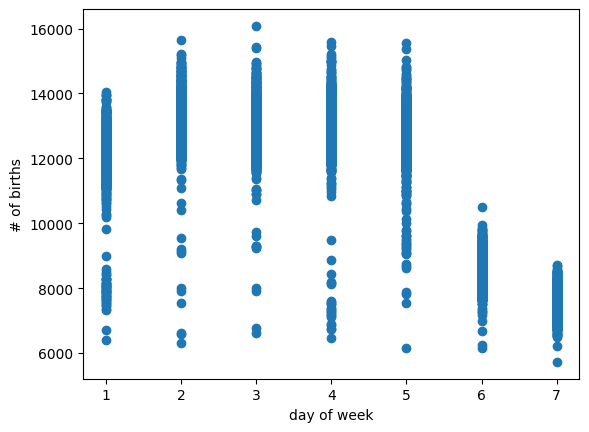

In [7]:
plt.scatter(df['day_of_week'], df['births'])
plt.xlabel('day of week')
plt.ylabel('# of births');

There's a lot of scatter here, so let's use a boolean array to select only the data pertaining to June.

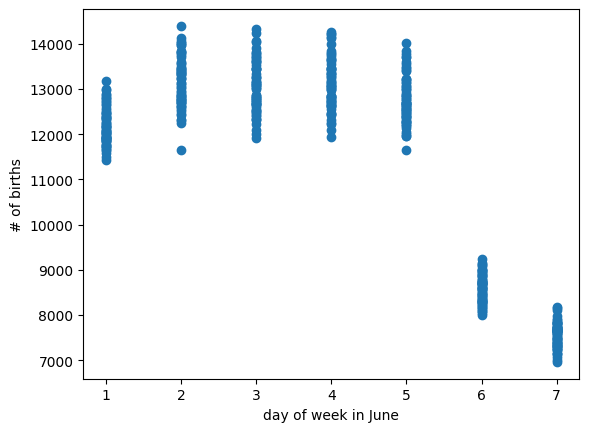

In [8]:
month_sel = df['month'] == 6
plt.scatter(df['day_of_week'][month_sel], df['births'][month_sel])
plt.xlabel('day of week in June')
plt.ylabel('# of births');

Scatter plots aren't the best way to look at discrete data.  A better tool is a violin plot, which plots a kernel density estimate (basically a smoothed histogram) of the distribution of points within each discrete value.  `seaborn` has a nice implementation of such a plotting routine.

In [9]:
import seaborn as sns

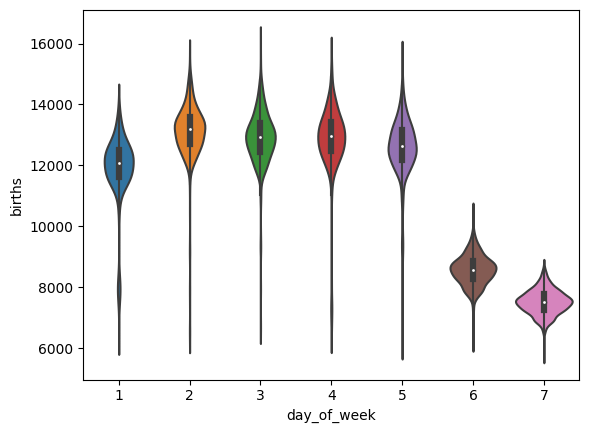

In [10]:
sns.violinplot(x='day_of_week', y='births', data=df);

Now let's use some more advanced features of `pandas`.  First we'll group the data entries by year and compute the total number of births each year.

In [11]:
year_grp = df.groupby('year')
year_grp.sum()

,month,date_of_month,day_of_week,births
year,,,,
2000,2384,5767,1469,4149598
2001,2382,5738,1457,4110963
2002,2382,5738,1458,4099313
2003,2382,5738,1459,4163060
2004,2384,5767,1465,4186863
2005,2382,5738,1462,4211941
2006,2382,5738,1463,4335154
2007,2382,5738,1457,4380784
2008,2384,5767,1461,4310737


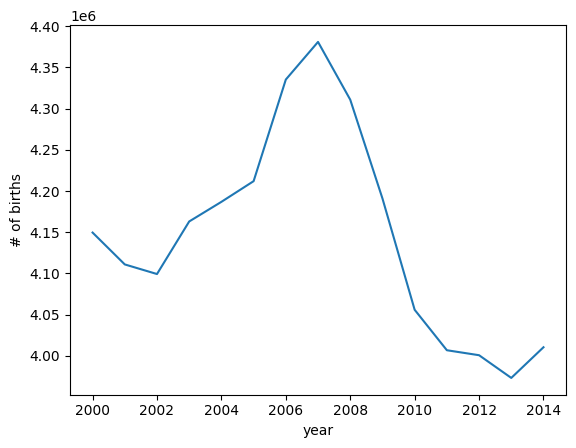

In [12]:
births_by_year = year_grp.sum()

plt.plot(births_by_year.index, births_by_year.births)
plt.ylabel('# of births')
plt.xlabel('year');

Now by day of the month.

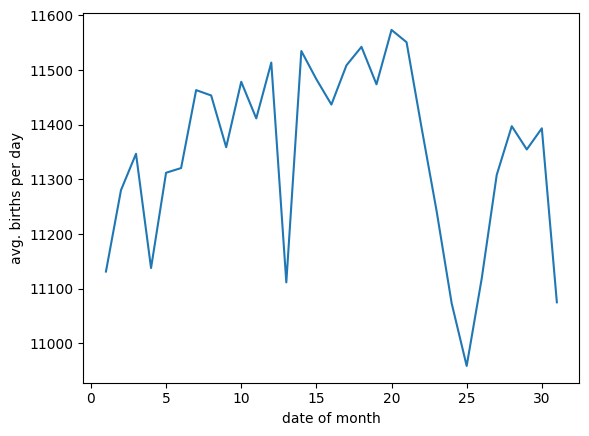

In [13]:
grp = df.groupby('date_of_month')
birth_by_date = grp.mean()

plt.plot(birth_by_date.index, birth_by_date.births)
plt.xlabel('date of month')
plt.ylabel('avg. births per day');

Do people want to make sure they don't miss presents?

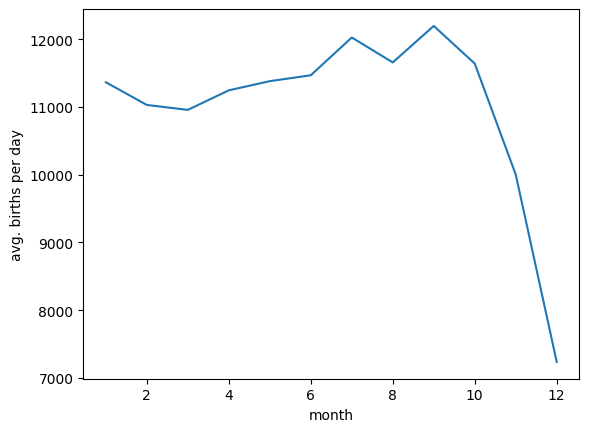

In [14]:
christmas_date_sel = (df['date_of_month'] == 24) | (df['date_of_month'] == 25)

christmas_date_grp = df[christmas_date_sel].groupby('month')
christmas_date_birth_by_month = christmas_date_grp.mean()

plt.plot(christmas_date_birth_by_month.index, christmas_date_birth_by_month.births)
plt.xlabel('month')
plt.ylabel('avg. births per day');

It looks like they don't want to miss out on turkey either...  Let's try ignoring holidays.

In [15]:
from pandas.tseries.holiday import USFederalHolidayCalendar
from datetime import datetime

In [16]:
dates = np.array([datetime(y, m, d) for (y, m, d) in df[['year', 'month', 'date_of_month']].values])
print(dates)

[datetime.datetime(2000, 1, 1, 0, 0) datetime.datetime(2000, 1, 2, 0, 0)
 datetime.datetime(2000, 1, 3, 0, 0) ...
 datetime.datetime(2014, 12, 29, 0, 0)
 datetime.datetime(2014, 12, 30, 0, 0)
 datetime.datetime(2014, 12, 31, 0, 0)]


In [17]:
fed_cal = USFederalHolidayCalendar()
holidays = fed_cal.holidays(start=dates.min(), end=dates.max()).to_pydatetime()
print(datetime(2000, 12, 25) in holidays)

True


In [18]:
holiday_sel = np.array([date in holidays for date in dates])

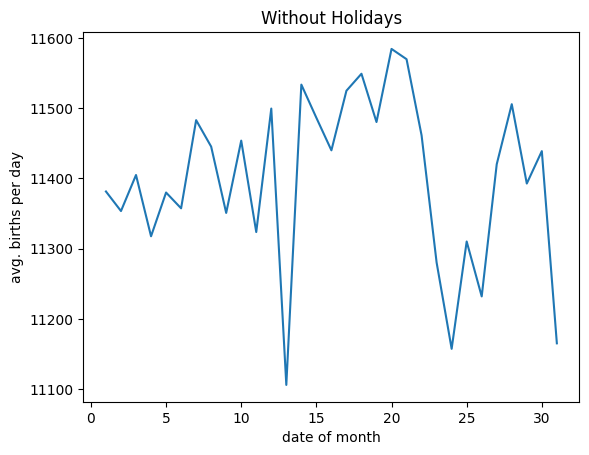

In [19]:
grp = df[~holiday_sel].groupby('date_of_month')
birth_by_date = grp.mean()

plt.plot(birth_by_date.index, birth_by_date.births)
plt.xlabel('date of month')
plt.ylabel('avg. births per day')
plt.title('Without Holidays');

Better, but still not great.  Let's try adding a few more holidays.

In [20]:
print(datetime(2000, 12, 24) in holidays)
print(datetime(2000, 12, 31) in holidays)

False
False


In [21]:
from pandas.tseries.holiday import get_calendar, Holiday, HolidayCalendarFactory, FR

In [22]:
xmas_eve = Holiday('Christmas Eve', month=12, day=24)
new_years_eve = Holiday('New Year\'s Eve', month=12, day=31)
black_friday = Holiday("Black Friday", month=11, day=1, offset=pd.DateOffset(weekday=FR(4)))

cal = HolidayCalendarFactory('ExpandedHolidayCal', fed_cal, [black_friday, xmas_eve, new_years_eve])()
holidays = cal.holidays(start=dates.min(), end=dates.max()).to_pydatetime()
holiday_sel = np.array([date in holidays for date in dates])

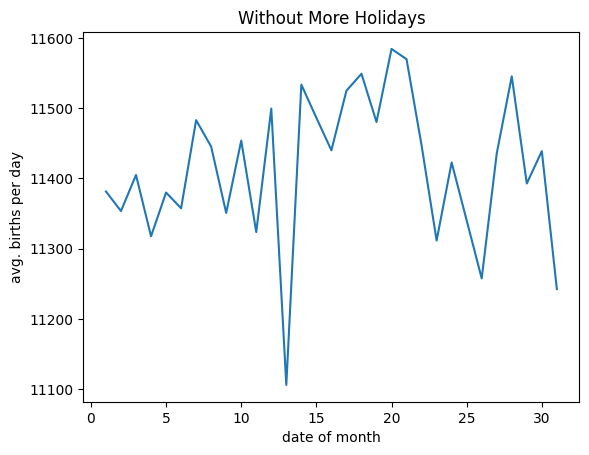

In [23]:
grp = df[~holiday_sel].groupby('date_of_month')
birth_by_date = grp.mean()

plt.plot(birth_by_date.index, birth_by_date.births)
plt.xlabel('date of month')
plt.ylabel('avg. births per day')
plt.title('Without More Holidays');

It looks like people may be superstitious...

**NOTE**: From now on we'll leave out holidays.

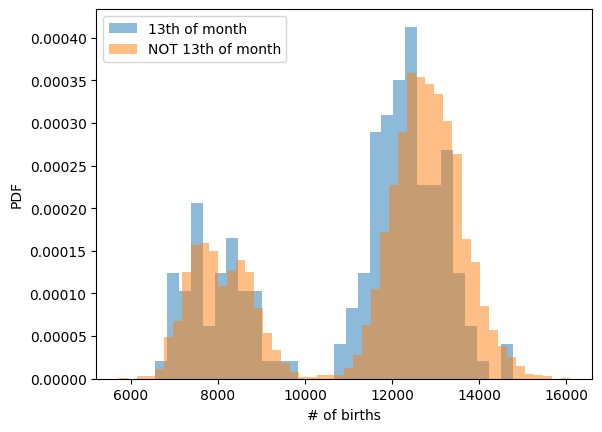

In [24]:
thirteenth_sel = df['date_of_month'] == 13

plt.hist(df[thirteenth_sel & ~holiday_sel]['births'], density=True, alpha=0.5, bins=30, label='13th of month')
plt.hist(df[~thirteenth_sel & ~holiday_sel]['births'], density=True, alpha=0.5, bins=50, label='NOT 13th of month')
plt.xlabel('# of births')
plt.ylabel('PDF')
plt.legend();

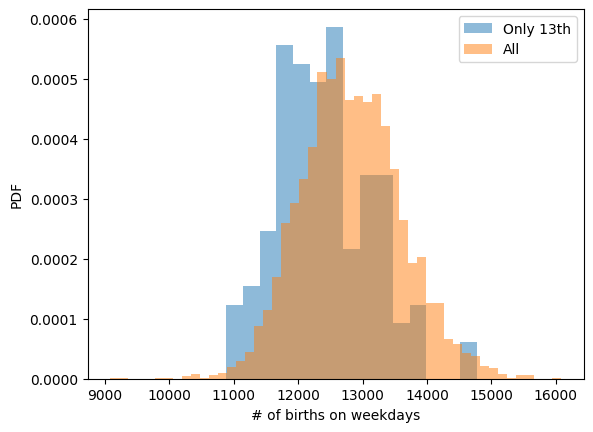

In [25]:
weekday_sel = df['day_of_week'] < 6
weekday_thirteenth_sel = (df['date_of_month'] == 13) & weekday_sel

plt.hist(df[weekday_thirteenth_sel & ~holiday_sel]['births'], density=True, alpha=0.5, bins=15, label='Only 13th')
plt.hist(df[weekday_sel & ~holiday_sel]['births'], density=True, alpha=0.5, bins=50, label='All')
plt.xlabel('# of births on weekdays')
plt.ylabel('PDF')
plt.legend();

Is Friday the 13th avoided more than the 13th on any other weekday?

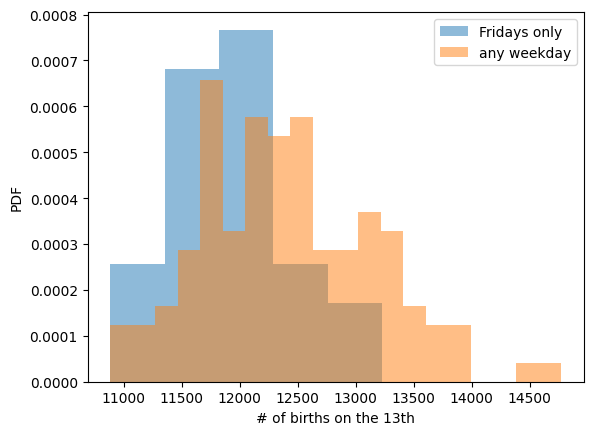

In [26]:
fri_thirteenth_sel = (df['date_of_month'] == 13) & (df['day_of_week'] == 5)

plt.hist(df[fri_thirteenth_sel & ~holiday_sel]['births'], density=True, alpha=0.5, bins=5, label='Fridays only')
plt.hist(df[weekday_thirteenth_sel & ~holiday_sel]['births'], density=True, alpha=0.5, bins=20, label='any weekday')
plt.xlabel('# of births on the 13th')
plt.ylabel('PDF')
plt.legend();